# 1. Import and Install Dependencies

In [30]:
!pip upgrade tensorflow-gpu==2.4.1

ERROR: unknown command "upgrade"



In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf


In [2]:
import time
cap = cv2.VideoCapture(0,cv2.CAP_DSHOW )
# Set mediapipe model 

while cap.isOpened():
    t = time.time()
        # Read feed
    ret, frame = cap.read()


        # Show to screen
    cv2.imshow('OpenCV Feed', frame)
    #print('fps', 1/(time.time()-t))
        # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    #tạm thời bỏ qua mặt
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    #mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    #mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    #tạm thời bỏ qua mặt
    # Draw face connections
    """mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) """
    # Draw pose connections
    """mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )"""
    # Draw left hand connections
    """mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )""" 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [10]:
import time
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)  
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        t = time.time()
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        print('fps', 1/(time.time()-t))
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

fps 1.7343208128636425
fps 32.345237636208
fps 26.36351865237751
fps 16.99433563203488
fps 19.282117293343692
fps 27.10076437483443
fps 14.003325298308638
fps 33.42261321348601
fps 18.75295201219703
fps 28.17635480555425
fps 18.550494909377182
fps 18.882374126629692
fps 18.784026225866693
fps 27.454125347733594
fps 18.897262032952924
fps 17.965373973083874
fps 21.05532017429369
fps 27.841750305347563
fps 18.90748445902999
fps 17.608550905343055
fps 21.194378894071157
fps 27.814793692056714
fps 18.73577943948612


In [10]:
draw_landmarks(frame, results)

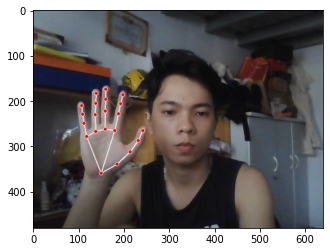

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [13]:
len(results.right_hand_landmarks.landmark)

21

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [105]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [28]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (1373052555.py, line 2)

In [7]:
def extract_keypoints(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #tạm thời bỏ qua mặt
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    #lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([rh])

In [11]:
def extract_keypoints_E(results):
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test.shape

(63,)

In [124]:
np.save('0', result_test)

In [125]:
np.load('0.npy')

array([ 0.3835876 ,  0.47759178, -0.77978629, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [40]:
# Path for exported data, numpy arrays
DATA_TRAIN_PATH = os.path.join("For thesis\MP_Data_Train") 

# Path for video
VIDEO_TRAIN_PATH = os.path.join("For thesis\MP_Video_Train")

# Actions that we try to detect
#actions =       np.array([ "aw","ee","ow","sac", "hoi","nang","nothing","aa","oo","uw", "nga","huyen" ])
#actions_train = np.array([ "aw","ee","ow","sac", "hoi","nang","nothing","aa","oo","uw", "nga","huyen" ])
#actions_train = np.array([ "aw"])
actions_train = np.array(["nga"])
#actions_train = np.array([ "hoi","nang","nothing"])
#actions_train = np.array(["aa"])
#actions_train = np.array(["oo"])
#actions_train = np.array(["uw"])
#actions_train = np.array(["nga"])
#actions_train = np.array(["huyen"])
#"aw","ee","ow","sac", "hoi","nang","nothing" 
# Thirty videos worth of data
no_sequences_train = 1

# Videos are going to be 30 frames in length
sequence_length = 50

# Folder start
start_folder = 0

In [16]:
os.path.join(DATA_PATH, action)

NameError: name 'action' is not defined

In [56]:
np.array(os.listdir(os.path.join(DATA_PATH, action)))

array([], dtype=float64)

In [42]:
for action in actions_train: 
    for sequence in range(no_sequences_train):
        try: 
            os.makedirs(os.path.join(DATA_TRAIN_PATH, action, str(sequence)))
            os.makedirs(os.path.join(VIDEO_TRAIN_PATH, action))
        except:
            pass

In [57]:
for action in actions_train: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_TRAIN_PATH, action))).astype(int))
    for sequence in range(1,no_sequences_train+1):
        try: 
            os.makedirs(os.path.join(DATA_TRAIN_PATH, action, str(dirmax+sequence)))
            os.makedirs(os.path.join(VIDEO_TRAIN_PATH, action))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [10]:
print(wv_path)

NameError: name 'wv_path' is not defined

In [43]:
import time
cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)

# get the size of the frame
w = int(cap.get(3))
h = int (cap.get(4))

#archive file type
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions_train:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences_train):
            # Loop through video length aka sequence length
            #write video
            wv_path = os.path.join(VIDEO_TRAIN_PATH, action, '{}.mp4'.format(str(sequence)))
            VDWT = cv2.VideoWriter (wv_path,fourcc,30,(w,h))
            for frame_num in range(sequence_length):
                t = time.time()
                # Read feed
                ret, frame = cap.read()
                if ret == False:
                    break
                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_TRAIN_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                VDWT.write(image)
                # Break gracefully
                print('fps', 1/(time.time()-t))
                if cv2.waitKey(5) & 0xFF == ord('q'):
                    break
            VDWT.release()

                    
    cap.release()
    
    cv2.destroyAllWindows()

fps 0.5502556653596528
fps 20.05749973698557
fps 19.38845282669995
fps 13.736593545513497
fps 13.362762839301643
fps 14.517331967312412
fps 14.485895062581163
fps 13.944803327359955
fps 14.535342858826098
fps 14.355795295857178
fps 14.325200142080385
fps 14.532170104843013
fps 14.53106248527598
fps 14.323390101390231
fps 13.805999282429733
fps 14.322803159393665
fps 13.935907446232362
fps 13.919350610130456
fps 13.735468933695307
fps 13.02174479975163
fps 13.73533399265144
fps 13.728635255224784
fps 13.744921400084548
fps 13.924896002443486
fps 14.05164627527706
fps 12.086599946400938
fps 14.323977091494005
fps 13.93775981869598
fps 13.554148031333213
fps 13.93188023570209
fps 12.534079227330322
fps 14.138802367757506
fps 14.132799601048596
fps 13.370217242313638
fps 12.534603637580764
fps 12.320352958109723
fps 13.747624494826168
fps 13.198766442192712
fps 14.119098112877273
fps 14.1080326539948
fps 13.01770328988206
fps 13.959515679187385
fps 13.927485364582123
fps 13.748615895971758

In [158]:
cap.release()
cv2.destroyAllWindows()

# For test data


In [26]:
# Path for exported data, numpy arrays
DATA_PATH_TEST = os.path.join("MP_Data_Test") 

# Path for video
VIDEO_PATH_TEST = os.path.join("MP_Video_Test")
#actions =      np.array([ "aw","ee","ow","sac", "hoi","nang","nothing","aa","oo","uw", "nga","huyen" ])
# Actions that we try to detect
#actions_test = np.array([ "aw","ee","ow","sac", "hoi","nang","nothing","aa","oo","uw", "nga","huyen" ])
#actions_test = np.array(["aw","ee"])
#actions_test = np.array([ "ow","sac" ])
#actions_test = np.array([ "hoi","nang","nothing"])
#actions_test = np.array([ "aa","oo"])
#actions_test = np.array([ "oo"])
#actions_test = np.array([ "uw","nga"])
#actions_test = np.array([ "nga"])
actions_test = np.array([ "huyen"])
#"aw","ee","ow","sac", "hoi","nang","nothing" 
# Thirty videos worth of data
no_sequences_test = 20

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 40

In [94]:
for action in actions_test: 
    for sequence in range(no_sequences_test):
        try: 
            os.makedirs(os.path.join(DATA_PATH_TEST, action, str(sequence)))
            os.makedirs(os.path.join(VIDEO_PATH_TEST, action))
        except:
            pass

In [27]:
for action in actions_test: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH_TEST, action))).astype(int))
    for sequence in range(1,no_sequences_test+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH_TEST, action, str(dirmax+sequence)))
            os.makedirs(os.path.join(VIDEO_PATH_TEST, action))
        except:
            pass

In [ ]:
import time
cap = cv2.VideoCapture(0)

# get the size of the frame
w = int(cap.get(3))
h = int (cap.get(4))

#archive file type
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions_test:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences_test):
            # Loop through video length aka sequence length
            #write video
            wv_path = os.path.join(VIDEO_PATH_TEST, action, '{}.mp4'.format(str(sequence)))
            VDWT = cv2.VideoWriter (wv_path,fourcc,30,(w,h))
            for frame_num in range(sequence_length):
                t = time.time()
                # Read feed
                ret, frame = cap.read()
                if ret == False:
                    break
                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH_TEST, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                VDWT.write(frame)
                # Break gracefully
                print('fps', 1/(time.time()-t))
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            VDWT.release()

                    
    cap.release()
    
    cv2.destroyAllWindows()

fps 0.5810326670735725
fps 13.517716142090098
fps 13.546530931264574
fps 12.838946266445456
fps 13.931324941043611
fps 12.22020412147063
fps 13.359528086738269
fps 10.954188485093825
fps 13.735019140526504
fps 13.00668273002701
fps 13.05741859161945
fps 13.368810918664618
fps 13.29844830975466
fps 13.535164998289671
fps 13.623841618891397
fps 13.01330090068847
fps 13.528529129063264
fps 13.578721089844862
fps 10.893560434879722
fps 11.644763290281741
fps 13.02174479975163
fps 13.36246483607158
fps 13.538354276344457
fps 13.252899059030213
fps 13.548587579746426
fps 13.358464365678177
fps 13.192414754051955
fps 12.08123856844531
fps 11.79898728479802
fps 13.186732480271639
fps 0.9177028547373359
fps 12.970162130737428
fps 13.537873604028146
fps 13.36919443213729
fps 13.426241053022446
fps 11.935200598708679
fps 13.556776604134614
fps 13.363358885639094
fps 13.525824260874051
fps 10.897806046622808
fps 13.356167306191985
fps 13.671401657138015
fps 13.192539238197087
fps 13.70871260528371

# 6. Preprocess Data and Create Labels and Features

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [18]:
label_map = {label:num for num, label in enumerate(actions_train)}

In [19]:
label_map

{'aw': 0,
 'ee': 1,
 'ow': 2,
 'sac': 3,
 'hoi': 4,
 'nang': 5,
 'nothing': 6,
 'aa': 7,
 'oo': 8,
 'uw': 9,
 'nga': 10,
 'huyen': 11}

In [14]:
sequences_train, labels_train = [], []
for action in actions_train:
    for sequence in np.array(os.listdir(os.path.join(DATA_TRAIN_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_TRAIN_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences_train.append(window)
        labels_train.append(label_map[action])

In [64]:
print(window)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([ 3.48159134e-01,  9.04761016e-01,  3.83194305e-07,  3.95580322e-01,
        8.91195178e-01,  6.38091192e-03,  4.23494458e-01,  8.54793549e-01,
        2.24801898e-03,  4.46972907e-01,  8.28765273e-01, -6.75740838e-03,
        4.68349636e-01,  8.04538488e-01, -1.48754427e-02,  3.91465336e-01,
        7.53800273e-01, -5.72597189e-03,  4.49993998e-01,  7.52298653e-01,
       -2.86000390e-02,  4.80424494e-01,  7.80126572e-01, -4.22510430e-02,
        4.95147377e-01,  8.10238004e-01, -4.75291945e-02,  3.80178392e-01,
        7.49998808e-01, -1.96652934e-02,  4.61272031e-01,  7.63760686e-01,
       -4.54721898e-02,  4.79592174e-01,  8.10096025e-01, -5.27234897e-02,
        4.78446156e-01,  8.45756233e-01, -

In [15]:
type(sequences_train)

list

In [16]:
np.array(sequences_train).shape


(700, 30, 63)

In [69]:
np.array(labels_train).shape

(700,)

In [17]:
X = np.array(sequences_train)

In [18]:
X.shape

(700, 30, 63)

In [19]:
y = to_categorical(labels_train).astype(int)

In [20]:
y.shape

(700, 7)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15)

In [22]:
y_train.shape

(595, 7)

In [90]:
X_train.shape

(560, 30, 63)

In [91]:
X_val.shape

(140, 30, 63)

In [76]:
y_train.shape

(560, 7)

In [83]:
actions_train.shape[0]

7

# 7. Build and Train LSTM Neural Network

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [9]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [10]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,63)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions_train.shape[0], activation='softmax'))

In [11]:
model.compile(optimizer='Adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['categorical_accuracy'])

In [97]:
history = model.fit(X_train, y_train, epochs=310, callbacks=[tb_callback],validation_data=(X_val,y_val))

Epoch 1/310
18/18 [==============================] - 3s 64ms/step - loss: 1.8962 - categorical_accuracy: 0.1602 - val_loss: 1.2925 - val_categorical_accuracy: 0.5643
Epoch 2/310
18/18 [==============================] - 1s 28ms/step - loss: 1.3792 - categorical_accuracy: 0.4891 - val_loss: 1.0706 - val_categorical_accuracy: 0.6929
Epoch 3/310
18/18 [==============================] - 1s 28ms/step - loss: 1.0985 - categorical_accuracy: 0.6367 - val_loss: 0.6081 - val_categorical_accuracy: 0.7714
Epoch 4/310
18/18 [==============================] - 1s 29ms/step - loss: 0.7240 - categorical_accuracy: 0.7307 - val_loss: 0.3814 - val_categorical_accuracy: 0.8786
Epoch 5/310
18/18 [==============================] - 1s 29ms/step - loss: 0.4700 - categorical_accuracy: 0.8445 - val_loss: 0.4963 - val_categorical_accuracy: 0.8571
Epoch 6/310
18/18 [==============================] - 1s 29ms/step - loss: 0.4710 - categorical_accuracy: 0.8505 - val_loss: 0.4264 - val_categorical_accuracy: 0.8857
Epoc

Epoch 99/310
18/18 [==============================] - 1s 35ms/step - loss: 0.0996 - categorical_accuracy: 0.9745 - val_loss: 0.0310 - val_categorical_accuracy: 1.0000
Epoch 100/310
18/18 [==============================] - 1s 36ms/step - loss: 0.0324 - categorical_accuracy: 0.9945 - val_loss: 0.0331 - val_categorical_accuracy: 0.9857
Epoch 101/310
18/18 [==============================] - 1s 36ms/step - loss: 0.0229 - categorical_accuracy: 0.9968 - val_loss: 0.0223 - val_categorical_accuracy: 0.9857
Epoch 102/310
18/18 [==============================] - 1s 36ms/step - loss: 0.0259 - categorical_accuracy: 0.9917 - val_loss: 0.0506 - val_categorical_accuracy: 0.9857
Epoch 103/310
18/18 [==============================] - 1s 36ms/step - loss: 0.0628 - categorical_accuracy: 0.9834 - val_loss: 0.0193 - val_categorical_accuracy: 0.9857
Epoch 104/310
18/18 [==============================] - 1s 36ms/step - loss: 0.0328 - categorical_accuracy: 0.9919 - val_loss: 0.0154 - val_categorical_accuracy: 

Epoch 195/310
18/18 [==============================] - 1s 36ms/step - loss: 5.5639e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0129 - val_categorical_accuracy: 0.9929
Epoch 196/310
18/18 [==============================] - 1s 36ms/step - loss: 5.5519e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0121 - val_categorical_accuracy: 0.9929
Epoch 197/310
18/18 [==============================] - 1s 36ms/step - loss: 5.4157e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0122 - val_categorical_accuracy: 0.9929
Epoch 198/310
18/18 [==============================] - 1s 36ms/step - loss: 5.8327e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0122 - val_categorical_accuracy: 0.9929
Epoch 199/310
18/18 [==============================] - 1s 36ms/step - loss: 5.3955e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0123 - val_categorical_accuracy: 0.9929
Epoch 200/310
18/18 [==============================] - 1s 35ms/step - loss: 5.7942e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0129 - v

Epoch 290/310
18/18 [==============================] - 1s 36ms/step - loss: 7.7232e-06 - categorical_accuracy: 1.0000 - val_loss: 0.0130 - val_categorical_accuracy: 0.9929
Epoch 291/310
18/18 [==============================] - 1s 36ms/step - loss: 9.7495e-06 - categorical_accuracy: 1.0000 - val_loss: 0.0134 - val_categorical_accuracy: 0.9929
Epoch 292/310
18/18 [==============================] - 1s 36ms/step - loss: 8.9295e-06 - categorical_accuracy: 1.0000 - val_loss: 0.0133 - val_categorical_accuracy: 0.9929
Epoch 293/310
18/18 [==============================] - 1s 36ms/step - loss: 6.6669e-06 - categorical_accuracy: 1.0000 - val_loss: 0.0133 - val_categorical_accuracy: 0.9929
Epoch 294/310
18/18 [==============================] - 1s 36ms/step - loss: 8.2305e-06 - categorical_accuracy: 1.0000 - val_loss: 0.0135 - val_categorical_accuracy: 0.9929
Epoch 295/310
18/18 [==============================] - 1s 36ms/step - loss: 9.5346e-06 - categorical_accuracy: 1.0000 - val_loss: 0.0134 - v

In [96]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 64)            32768     
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 231       
Total params: 187,463
Trainable params: 187,463
Non-trainable params: 0
________________________________________________

In [98]:
# Train model
import matplotlib.pyplot as pyplot


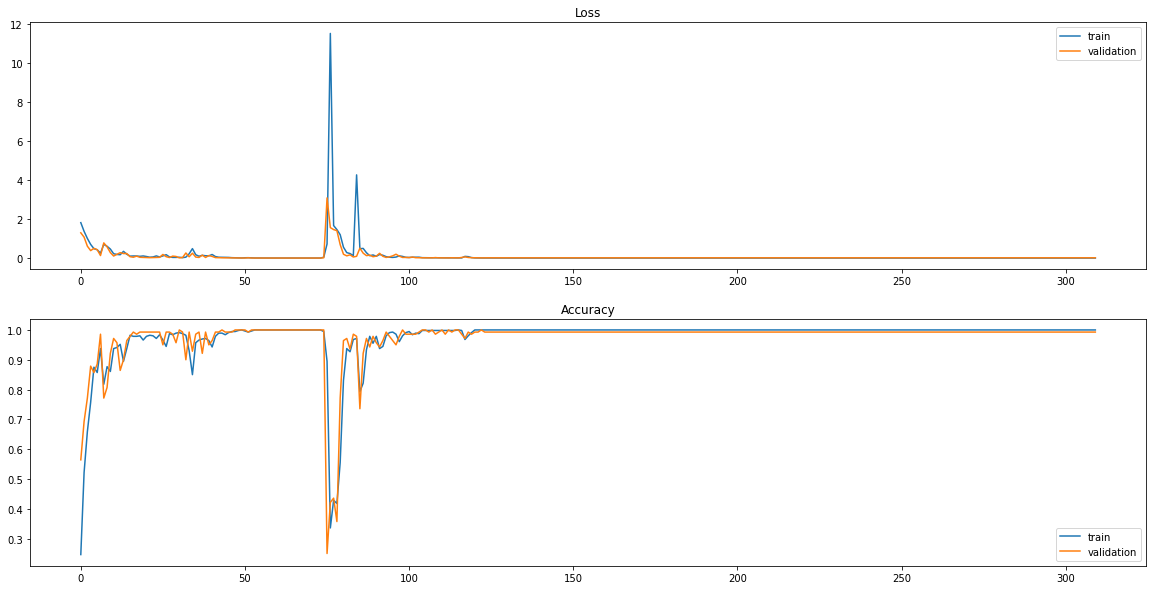

In [99]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(20,10))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['categorical_accuracy'], label='train')
pyplot.plot(history.history['val_categorical_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

# 7777 Trainmodel follow papper

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten,Dropout
from tensorflow.keras.callbacks import TensorBoard

In [21]:
log_dir = os.path.join('Logs_paper_18_4')
tb_callback = TensorBoard(log_dir=log_dir)

In [22]:
model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(30,63)))
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(actions_train.shape[0], activation='softmax'))

In [23]:
model.compile(optimizer='Adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['categorical_accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 256)           327680    
_________________________________________________________________
dropout (Dropout)            (None, 30, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           197120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 3840)              0         
_________________________________________________________________
dense (Dense)                (None, 12)                46092     
Total params: 570,892
Trainable params: 570,892
Non-trainable params: 0
__________________________________________________

In [33]:
history = model.fit(X_train, y_train, epochs=170,batch_size=32, callbacks=[tb_callback],validation_data=(X_val,y_val))

Epoch 1/170
19/19 [==============================] - 4s 90ms/step - loss: 0.1155 - categorical_accuracy: 0.3007 - val_loss: 0.0870 - val_categorical_accuracy: 0.5524
Epoch 2/170
19/19 [==============================] - 1s 59ms/step - loss: 0.0594 - categorical_accuracy: 0.7214 - val_loss: 0.0388 - val_categorical_accuracy: 0.8000
Epoch 3/170
19/19 [==============================] - 1s 57ms/step - loss: 0.0243 - categorical_accuracy: 0.8977 - val_loss: 0.0101 - val_categorical_accuracy: 0.9619
Epoch 4/170
19/19 [==============================] - 1s 57ms/step - loss: 0.0049 - categorical_accuracy: 0.9842 - val_loss: 0.0044 - val_categorical_accuracy: 0.9810
Epoch 5/170
19/19 [==============================] - 1s 56ms/step - loss: 0.0024 - categorical_accuracy: 0.9912 - val_loss: 0.0013 - val_categorical_accuracy: 1.0000
Epoch 6/170
19/19 [==============================] - 1s 54ms/step - loss: 0.0015 - categorical_accuracy: 0.9970 - val_loss: 0.0014 - val_categorical_accuracy: 0.9905
Epoc

Epoch 97/170
19/19 [==============================] - 1s 54ms/step - loss: 2.7014e-07 - categorical_accuracy: 1.0000 - val_loss: 0.0013 - val_categorical_accuracy: 0.9905
Epoch 98/170
19/19 [==============================] - 1s 54ms/step - loss: 3.0983e-07 - categorical_accuracy: 1.0000 - val_loss: 0.0013 - val_categorical_accuracy: 0.9905
Epoch 99/170
19/19 [==============================] - 1s 54ms/step - loss: 2.3268e-07 - categorical_accuracy: 1.0000 - val_loss: 0.0013 - val_categorical_accuracy: 0.9905
Epoch 100/170
19/19 [==============================] - 1s 54ms/step - loss: 2.7679e-07 - categorical_accuracy: 1.0000 - val_loss: 0.0013 - val_categorical_accuracy: 0.9905
Epoch 101/170
19/19 [==============================] - 1s 54ms/step - loss: 2.8608e-07 - categorical_accuracy: 1.0000 - val_loss: 0.0013 - val_categorical_accuracy: 0.9905
Epoch 102/170
19/19 [==============================] - 1s 54ms/step - loss: 2.5216e-07 - categorical_accuracy: 1.0000 - val_loss: 0.0013 - val_

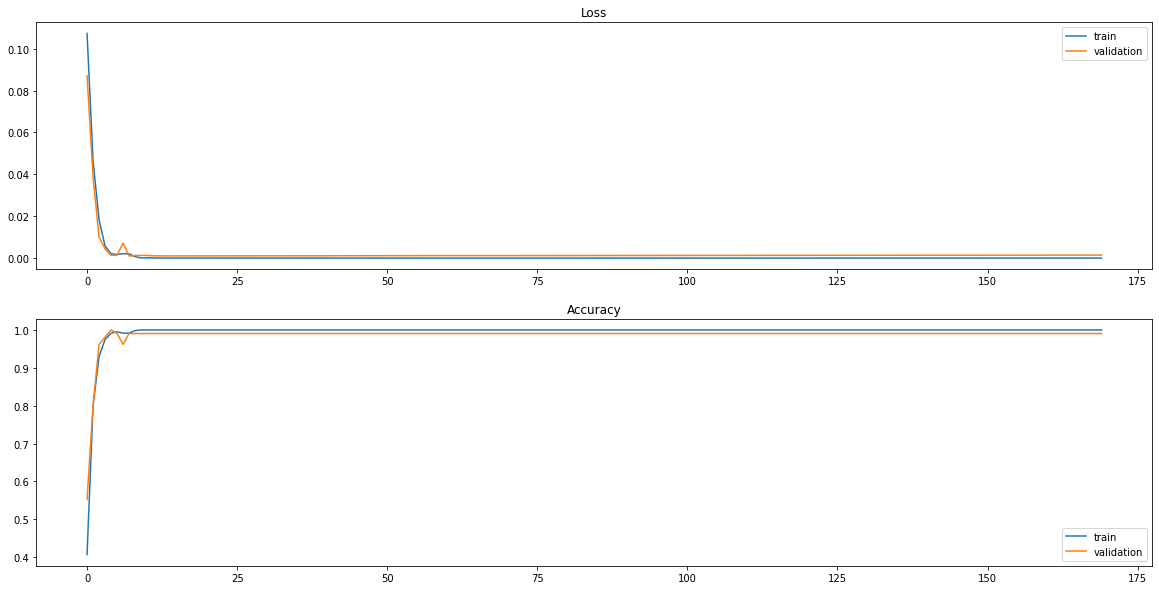

In [34]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(20,10))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['categorical_accuracy'], label='train')
pyplot.plot(history.history['val_categorical_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

# 8. Load data Test

In [37]:
sequences_test, labels_test = [], []
for action in actions_test:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH_TEST, action))).astype(int):
        window_test = []
        for frame_num in range(sequence_length):
            res_test = np.load(os.path.join(DATA_PATH_TEST, action, str(sequence), "{}.npy".format(frame_num)))
            window_test.append(res_test)
        sequences_test.append(window_test)
        labels_test.append(label_map[action])

In [38]:
X_test = np.array(sequences_test)
X_test.shape

(140, 30, 63)

In [39]:
y_test = to_categorical(labels_test).astype(int)
y_test.shape

(140, 7)

# 9. Make Predictions

In [40]:
res = model.predict(X_test)

In [41]:
actions_test[np.argmax(res[2])]

'aw'

In [42]:
actions_test[np.argmax(y_test[2])]

'aw'

# 10. Save Weights

In [43]:
model.save('Model_Papper_18_4.h5')

In [19]:
del model

In [25]:
model.load_weights('Model_Papper_18_4.h5')

ValueError: Cannot assign to variable dense/kernel:0 due to variable shape (3840, 12) and value shape (3840, 7) are incompatible

# 11. Evaluation using Confusion Matrix and Accuracy

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [46]:
yhat = model.predict(X_test)

In [47]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [48]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[120,   0],
        [  0,  20]],

       [[120,   0],
        [  0,  20]],

       [[119,   1],
        [  0,  20]],

       [[120,   0],
        [  0,  20]],

       [[120,   0],
        [  1,  19]],

       [[119,   1],
        [  0,  20]],

       [[120,   0],
        [  1,  19]]], dtype=int64)

In [49]:
accuracy_score(ytrue, yhat)

0.9857142857142858

In [50]:
y_hat = model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(y_test, axis=1)


# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)
# Tính Area under ROC
auc = roc_auc_score(y_test, y_hat, multi_class='ovr')
print('ROC AUC: %f' % auc)
# Tính confusion matrix
matrix = confusion_matrix(y_test_label, y_pred)
print(matrix)

Accuracy: 0.985714
Precision: 0.986395
Recall: 0.985714
F1 score: 0.985705
ROC AUC: 0.994583
[[20  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 20  0  0  0]
 [ 0  0  0  0 19  1  0]
 [ 0  0  0  0  0 20  0]
 [ 0  0  1  0  0  0 19]]


<AxesSubplot:>

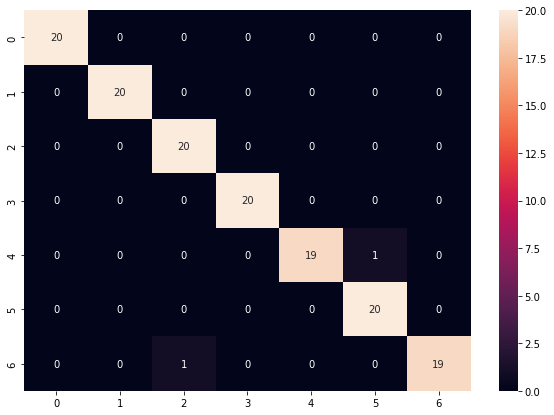

In [51]:
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in "0123456"],
                  columns = [i for i in "0123456"])
pyplot.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# 12. Test in Real Time

In [56]:
from scipy import stats

In [14]:
colors = [(245,117,16), (117,245,16), (16,117,245),(245,117,16), (117,245,16), (16,117,245),(245,117,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,20+num*40), (int(prob*60), 50+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 35+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

# 13. Run follow YTB

In [15]:
import time
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8
count=[]

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        t = time.time()
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        count.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions_test[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-20:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                            sentence.append(actions[np.argmax(res)])

            if len(sentence) > 6: 
                sentence = sentence[-6:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        print('fps', 1/(time.time()-t))
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 1.180542999161239
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 10.02716749463296
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 10.464960890230666
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 17.59178606180586
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 18.37197710020631
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 18.216778721703932
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 18.85292280031464
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 17.9057816028654
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 17.180828011649673
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 18.230318203352848
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 18.22730769063626
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 17.883488605112245
<class 'mediapipe.python.solution_base.SolutionO

NameError: name 'actions_test' is not defined

In [35]:
len(count)

51

In [30]:
len(sequence)

30

In [27]:
np.unique(predictions[-10:])[0]


6

In [29]:
res[np.argmax(res)]

1.0

In [28]:
sentence

['ow', 'nothing', 'ow', 'nothing', 'ow', 'nothing']

# 14. Improve Running

In [16]:
def draw_class_on_image(label,img):
    font = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (120,200)
    fontScale = 5
    fontColor = (20,20,200)
    thichkness=8
    lineType=2
    cv2.putText(img,label,
               bottomLeftCornerOfText,
               font,
               fontScale,
               fontColor,
               thichkness,
               lineType)
    return img

In [17]:
import time
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8
count=[]

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        t = time.time()
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        count.append(keypoints)
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])            
            predictions.append(np.argmax(res))            
            
        #3. Viz logic
            if np.unique(predictions[-1:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 6: 
                sentence = sentence[-6:]
        elif  len(sequence) > 30 and len(sequence) < 50:
            image = draw_class_on_image("STOP", image)
            cv2.rectangle(image, (120,200), (int((((len(sequence)-30)/20)*90*4)+150),210), (20,20,200), -1)
            
        elif  len(sequence) == 50:
            sequence = []
        
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        print('fps', 1/(time.time()-t))
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 1.8289342237513109
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 17.275297373883816
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 18.901775574583144
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 17.244614018353452
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 17.88592896466143
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 17.928206881812354
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 17.268113943176626
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 17.907998667884925
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 18.209897929501455
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 17.59097447941787
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 18.902201491696523
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 18.038155201183535
<class 'mediapipe.python.solution_base.Sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 13.363997565723862
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 13.342401521826956
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 13.10617607999375
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 13.01733967704192
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 13.189344888634526
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 12.981723528519652
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 13.194074735838788
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 13.506920426367822
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 13.533112422522578
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 13.541719938527502
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 13.092430102290853
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 13.198974116906616
<class 'mediapipe.python.solution_base.Sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 21.33105493085964
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 25.043611177454025
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 26.79741117691782
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 19.15268524564712
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 27.09498708010336
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 20.915257956098095
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 26.270717851393925
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 26.268085399535302
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 25.706062611850655
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 25.707953319603806
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 9.269712734875373
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fps 13.193410692997052
<class 'mediapipe.python.solution_base.Soluti

KeyboardInterrupt: 

In [147]:
predictions[-2:]

[2, 2]

In [167]:
predictions

[6, 5, 6, 1, 2, 0, 4, 4, 4, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 6]

In [168]:
np.unique(predictions)

array([0, 1, 2, 4, 5, 6], dtype=int64)

In [163]:
np.unique(predictions[-2:])[0]

2

In [162]:
np.argmax(res)

2

In [132]:
len(keypoints)

63

In [34]:
len(sequence)

31

In [24]:
actions[np.argmax(res)]

'ow'